In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(17,10)})
sns.set_context("poster", font_scale = 1)

In [4]:
connection = sqlite3.connect('./bobby.cool00763_final.db')
cursor = connection.cursor()

## Sebaran _Word Count_ pada _Tweet_

Sebaran jumlah kata dalam _tweet_ yang sudah dibersihkan

In [18]:
get_cleantweet = '''SELECT t.tweetid, t.cleantweet FROM Tweet t'''
cleantweet_df = pd.read_sql(sql=get_cleantweet, con=connection)

In [19]:
cleantweet_list = cleantweet_df[['cleantweet']].values.flatten().tolist()
wordcount = [len(cleantweet.split(' ')) for cleantweet in cleantweet_list]

cleantweet_df['wordcount'] = wordcount

In [9]:
sns.boxplot(data=cleantweet_df, x='wordcount')
plt.savefig('./assets/wordcount_boxplot.png')
plt.clf()
plt.show()

<Figure size 1224x720 with 0 Axes>

## Sebaran _Polarity_

In [20]:
get_sentiment_table = '''SELECT DISTINCT * FROM Sentiment s'''
sentiment_dataset = pd.read_sql(sql=get_sentiment_table, con=connection)

In [21]:
sentiment_dataset

,tweetid,positive,negative,neutral,compound,sentiment
0,1329245159742201856,0.000,0.146,0.854,-0.3400,-1
1,1329245336821350401,0.000,0.000,1.000,0.0000,0
2,1329245342093590529,0.000,0.000,1.000,0.0000,0
3,1329245377518702605,0.000,0.000,1.000,0.0000,0
4,1329245472863645696,0.000,0.000,1.000,0.0000,0
...,...,...,...,...,...,...
3745,1332318269194309633,0.000,0.216,0.784,-0.2960,-1
3746,1332317909952020480,0.000,0.000,1.000,0.0000,0
3747,1332317881992949760,0.659,0.000,0.341,0.7003,1
3748,1332317767567953920,0.416,0.000,0.584,0.9022,1


In [35]:
sns.set_context("poster", font_scale = 0.6)

fig, ax_pie = plt.subplots(2, 1, figsize=(16, 6))

sns.kdeplot(data=sentiment_dataset, x='compound', shade=True, ax=ax_pie[0], color="Blue")
ax_pie[0].set_title("Sebaran Compound", fontweight="bold")

sns.kdeplot(data=sentiment_dataset, x='sentiment', shade=True, ax=ax_pie[1], color="Green")
ax_pie[1].set_title("Sebaran Sentimen", fontweight="bold")

fig.tight_layout()
plt.savefig('./assets/polarity_distplot.png')
plt.clf()
plt.show()

<Figure size 1152x432 with 0 Axes>

## _Most Frequent Words_

In [36]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def part_of_speech(word):
    tag = nltk.pos_tag([word])[0][1][0]
    nltk_tag_to_wordnet_tag = {
        'J': wordnet.ADJ, 
        'V': wordnet.VERB, 
        'N': wordnet.NOUN,
        'R': wordnet.ADV
    }
    try:
        return nltk_tag_to_wordnet_tag[tag]
    except KeyError: 
        return ''

def tweet_splitter(tweet_list):
    word_corpus = []
    for tweet in tweet_list:
        for word in tweet[0].split(' '):
            pos = part_of_speech(word)
            if pos == 'n':
                word_corpus.append(word)
    
    return word_corpus

def tweetlist_to_freqdist(tweetlist):
    word_corpus = tweet_splitter(tweetlist)
    word_freq = FreqDist(word_corpus)
    
    return word_freq

For all sentiments

In [37]:
join_sentiment_cleantweet = '''
    SELECT DISTINCT(Tw.cleantweet), Se.sentiment FROM
    Sentiment Se INNER JOIN Tweet Tw
    ON Se.tweetid = Tw.tweetid
'''

sentiment_cleantweet = pd.read_sql(con=connection, sql=join_sentiment_cleantweet)

In [38]:
sentiment_cleantweet

,cleantweet,sentiment
0,arrest bill gate conspirator pt3 covid19 virus...,-1
1,new york covid spike school close indefinitely...,0
2,next pandemic force mandatoryvaccination vacci...,0
3,find concern week pfizer announce vaccine 90 e...,1
4,arrest bill gate conspirator pt2 covid19 virus...,-1
...,...,...
3437,suspect north korean hacker target covid vacci...,-1
3438,prediction upcoming news headline vaccine hai ...,0
3439,good good corona covid19 vaccine,1
3440,lydia g antivax staunch vaccine proponent stor...,1


In [39]:
cleantweet_list = sentiment_cleantweet[['cleantweet']].values.tolist()
cleantweet_freqdist = tweetlist_to_freqdist(cleantweet_list)

In [46]:
cleantweet_freqdist_df = pd.DataFrame(data=cleantweet_freqdist.most_common(20), columns=['Word', 'Word Count'])
sns.barplot(data=cleantweet_freqdist_df, x='Word Count', y='Word', palette=sns.color_palette("mako"))
# sns.set_context("poster", font_scale = 1)

plt.savefig('./assets/cleantweet_freqdist.png')
plt.clf()
plt.show()

<Figure size 1224x720 with 0 Axes>

Sentiment positive

In [47]:
positive_sentiment = sentiment_cleantweet[sentiment_cleantweet['sentiment'] == 1]
positive_sentiment

,cleantweet,sentiment
3,find concern week pfizer announce vaccine 90 e...,1
5,reuters flu vaccine approve civilian use 1946 ...,1
6,covid alert stay home everyone must wear real ...,1
7,rt pcr reveal virus part specific gene sequenc...,1
9,uml positive budget ril hold 51 uml hhl look g...,1
...,...,...
3433,thing go party like 1999 let vaccine safer pri...,1
3436,algeria الجزائر coronavirus covid_19 lockdown ...,1
3439,good good corona covid19 vaccine,1
3440,lydia g antivax staunch vaccine proponent stor...,1


In [48]:
positive_cleantweet_list = positive_sentiment[['cleantweet']].values.tolist()
positive_freqdist = tweetlist_to_freqdist(positive_cleantweet_list)

In [50]:
positive_freqdist_df = pd.DataFrame(data=positive_freqdist.most_common(20), columns=['Word', 'Word Count'])
sns.barplot(data=positive_freqdist_df, x='Word Count', y='Word', palette=sns.color_palette("mako"))

plt.savefig("./assets/positive_freqdist.png")
plt.clf()
plt.show()

<Figure size 1224x720 with 0 Axes>

Negative sentiment

In [51]:
negative_sentiment = sentiment_cleantweet[sentiment_cleantweet['sentiment'] == -1]
negative_sentiment

,cleantweet,sentiment
0,arrest bill gate conspirator pt3 covid19 virus...,-1
4,arrest bill gate conspirator pt2 covid19 virus...,-1
10,steal davetvchannel hilarious vaccine covid19,-1
13,arrest bill gate conspirator pt1 computingfore...,-1
17,watch fake vaccine watch government announceme...,-1
...,...,...
3426,astrazeneca mistake covid19 vaccine trial coul...,-1
3432,suspect prove report chinese whisper north kor...,-1
3434,see jesus people like give jesus people bad na...,-1
3435,fuck whole bunch vaccine torycorruption bolloc...,-1


In [52]:
negative_cleantweet_list = negative_sentiment[['cleantweet']].values.tolist()
negative_freqdist = tweetlist_to_freqdist(negative_cleantweet_list)

In [54]:
negative_freqdist_df = pd.DataFrame(data=negative_freqdist.most_common(20), columns=['Word', 'Word Count'])
sns.barplot(data=negative_freqdist_df, x='Word Count', y='Word', palette=sns.color_palette("mako"))

plt.savefig('./assets/negative_freqdist.png')
plt.clf()
plt.show()

<Figure size 1224x720 with 0 Axes>

## Word Cloud

*Word cloud* dari seluruh *most frequent words*

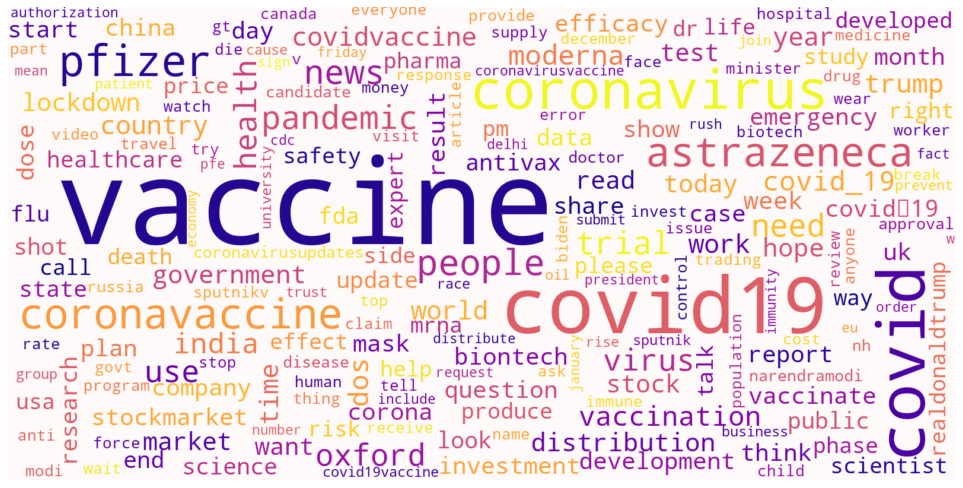

In [34]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='plasma', 
                      background_color='snow').generate_from_frequencies(cleantweet_freqdist)

# plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

Word cloud dari tweet dengan sentiment positive

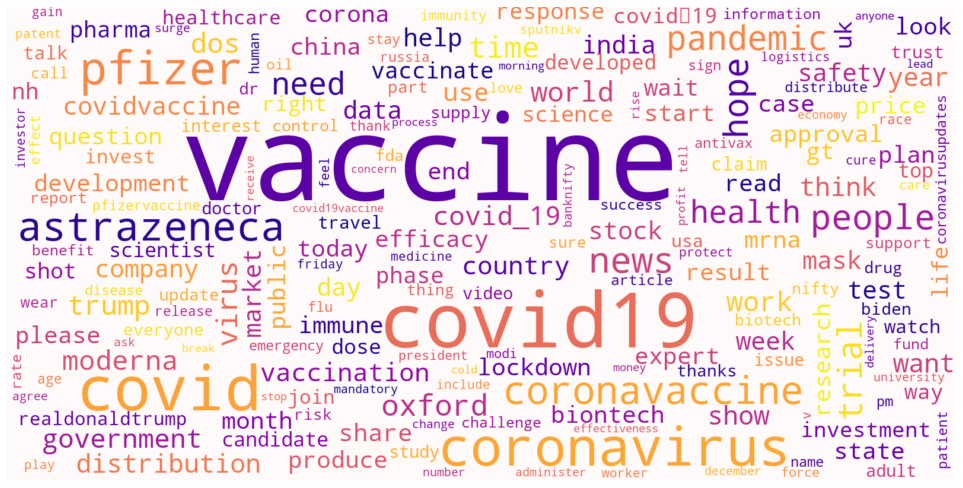

In [35]:
positive_wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='plasma', 
                               background_color='snow').generate_from_frequencies(positive_freqdist)

# plt.figure(figsize=(15, 12))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

Word cloud dari kata bersentimen negatif

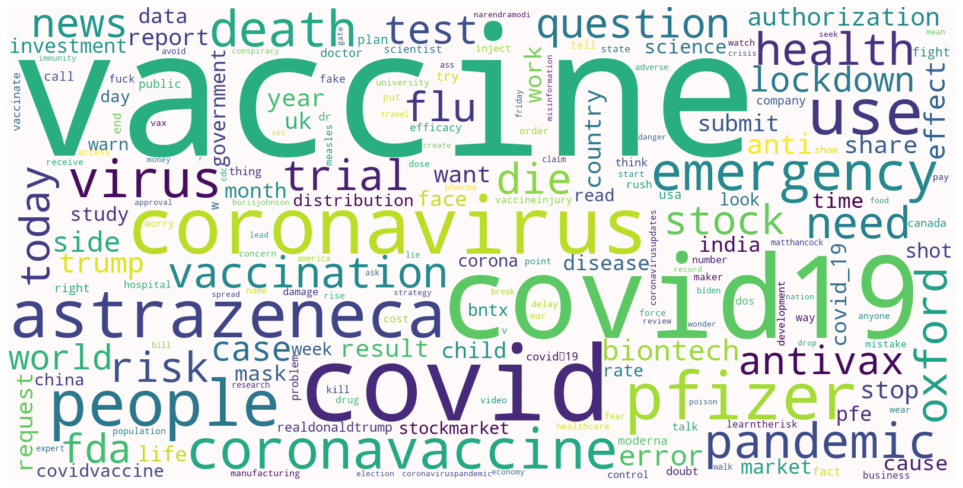

In [38]:
negative_wordcloud = WordCloud(width=1600, height=800, max_font_size=300, colormap='viridis',
                              background_color='snow').generate_from_frequencies(negative_freqdist)

# plt.figure(figsize=(15, 12))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

## Pengaruh Status _Verified_ terhadap Rataan Sentimen _Tweet_

In [55]:
join_tweet_sentiment='''
    SELECT u.userid, u.verified, AVG(s.compound) as avg_compound FROM
    User u INNER JOIN Tweet t ON u.userid = t.userid 
    INNER JOIN Sentiment s ON s.tweetid = t.tweetid
    GROUP BY u.userid 
'''

user_compound_df = pd.read_sql(sql=join_tweet_sentiment, con=connection)
avg_compound = user_compound_df['avg_compound'].values.tolist()

avg_sentiment = []
for val in avg_compound:
    avg_sentiment.append("Positive" if val >= 0.05 else ("Negative" if val <= -0.05 else "Neutral"))
user_compound_df.drop(columns=['avg_compound'], inplace=True)
user_compound_df['avg_sentiment'] = avg_sentiment

user_compound_df

,userid,verified,avg_sentiment
0,3198991,1,Positive
1,3568351,0,Neutral
2,3791871,0,Neutral
3,5120691,1,Negative
4,5398862,0,Positive
...,...,...,...
2794,1331397023510171654,0,Negative
2795,1331468909925556225,0,Positive
2796,1331626893016064001,0,Positive
2797,1331718747271299073,0,Neutral


In [56]:
grouped_sentiment_count = user_compound_df.groupby(['verified','avg_sentiment'])['avg_sentiment'].count()

legend = ['Negative', 'Neutral', 'Positive']
unverified = list(grouped_sentiment_count[0])
verified = list(grouped_sentiment_count[1])

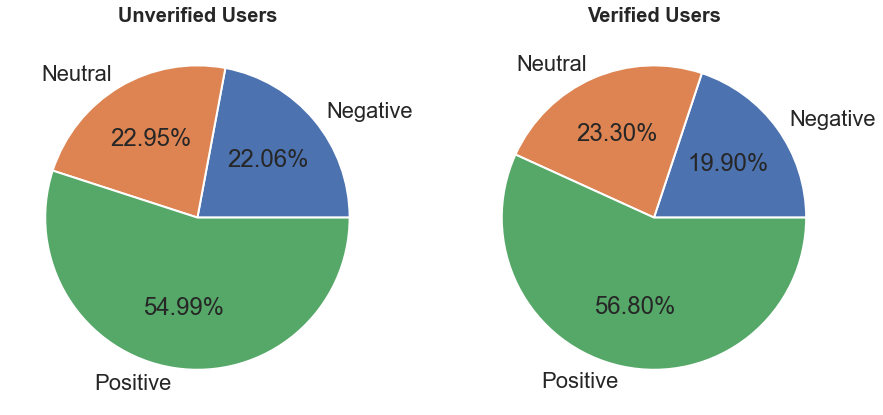

In [57]:
fig, ax_pie = plt.subplots(1, 2, figsize=(15, 12))

ax_pie[0].pie(unverified, labels=legend, autopct='%1.2f%%')
ax_pie[0].set_title("Unverified Users", fontweight="bold", fontsize=20)

ax_pie[1].pie(verified, labels=legend, autopct='%1.2f%%')
ax_pie[1].set_title("Verified Users", fontweight="bold", fontsize=20)
plt.show()